In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

In [2]:
# This can help keep the notebook output clean
warnings.filterwarnings("ignore")

In [248]:
# Load the dataset from an Excel file into a pandas DataFrame
df=pd.read_excel(r"Bike.xlsx")

# Display the first 5 rows of the DataFrame
df.head()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


## Eliminate Irrelevant column

In [251]:
# Eliminate the 'ID' column from the DataFrame as it is not relevant
df.drop(columns=['ID'],inplace=True)
df.head()

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


## Basic Analysis

In [254]:
# shape of the DataFrame to get the number of rows and columns
df.shape

(1000, 13)

In [256]:
# Show a summary of the DataFrame's structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Martial Status    1000 non-null   object
 1   Gender            1000 non-null   object
 2   Income            1000 non-null   int64 
 3   Children          1000 non-null   int64 
 4   Education         1000 non-null   object
 5   Occupation        1000 non-null   object
 6   Home Owner        1000 non-null   object
 7   Cars              1000 non-null   int64 
 8   Commute Distance  1000 non-null   object
 9   Region            1000 non-null   object
 10  Age               1000 non-null   int64 
 11  Age Brackets      1000 non-null   object
 12  Purchased Bike    1000 non-null   object
dtypes: int64(4), object(9)
memory usage: 101.7+ KB


In [258]:
# Print unique values for each column in the list
for col in df:
    if df[col].dtype == 'O':
        print(f"Unique values in '{col}':")
        print(pd.unique(df[col]))
        print()

Unique values in 'Martial Status':
['Married' 'Single']

Unique values in 'Gender':
['Female' 'Male']

Unique values in 'Education':
['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']

Unique values in 'Occupation':
['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']

Unique values in 'Home Owner':
['Yes' 'No']

Unique values in 'Commute Distance':
['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' 'More than 10 Miles']

Unique values in 'Region':
['Europe' 'Pacific' 'North America']

Unique values in 'Age Brackets':
['Middle Age' 'Old' 'Adolescent']

Unique values in 'Purchased Bike':
['No' 'Yes']



In [260]:
# Count the number of null values in each column
df.isnull().sum()

Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64

In [262]:
# Provide a summary of statistics for numerical features in the DataFrame
# Includes measures like mean, median, standard deviation, and range to understand the data distribution
df.describe()

,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,56360.000000,1.898000,1.442000,44.163000
std,31085.635215,1.628572,1.125123,11.364488
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,35.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


In [264]:
# This helps identify any anomalies or errors in the 'Age' data
df[df['Age']<0]

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike


## Graphical Representation

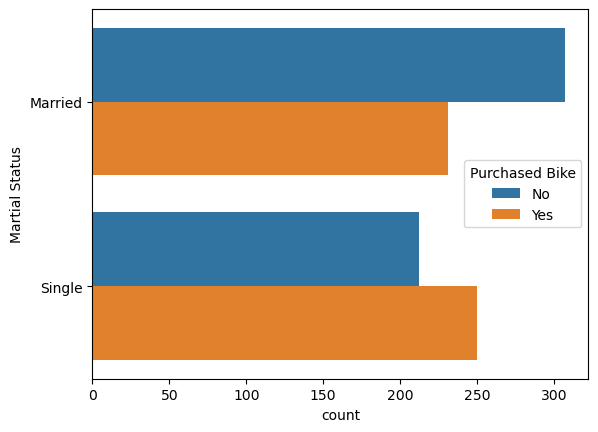

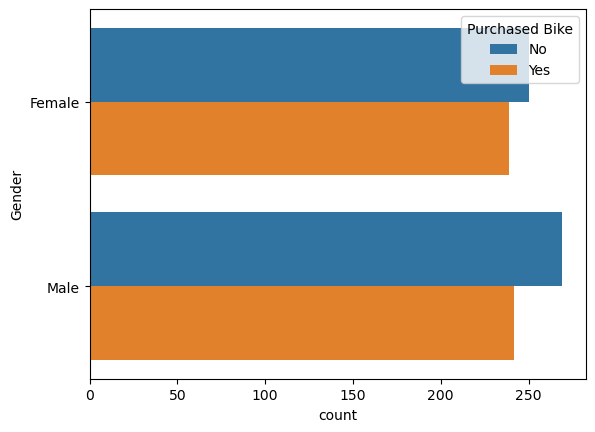

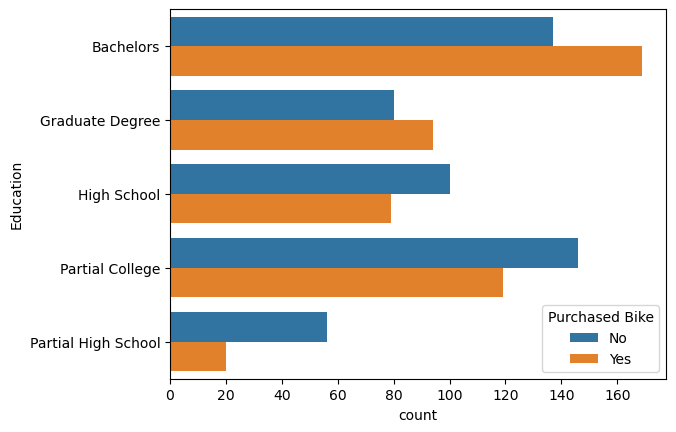

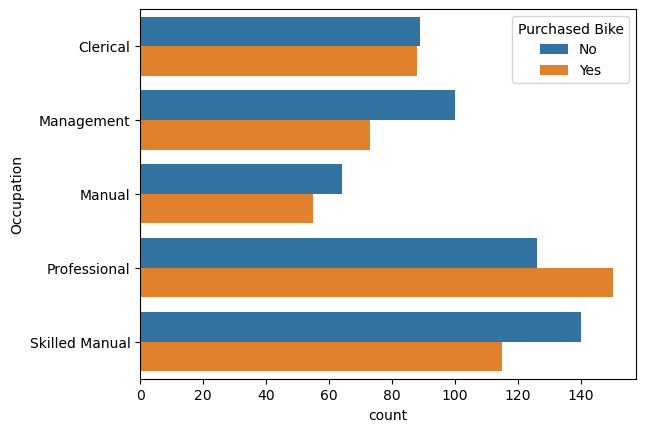

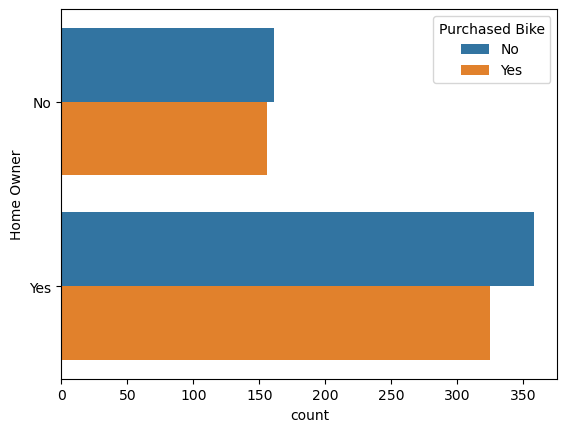

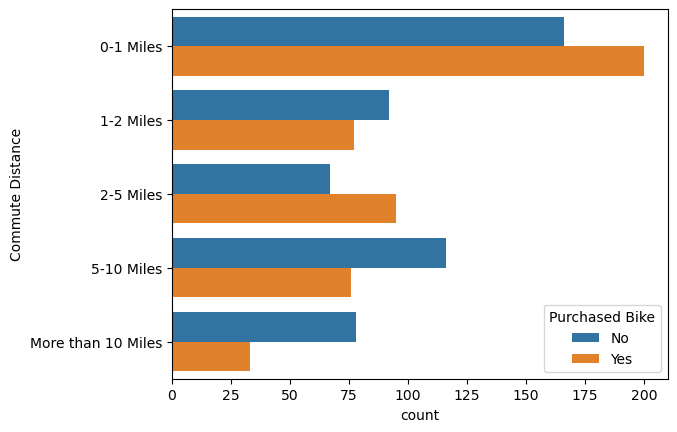

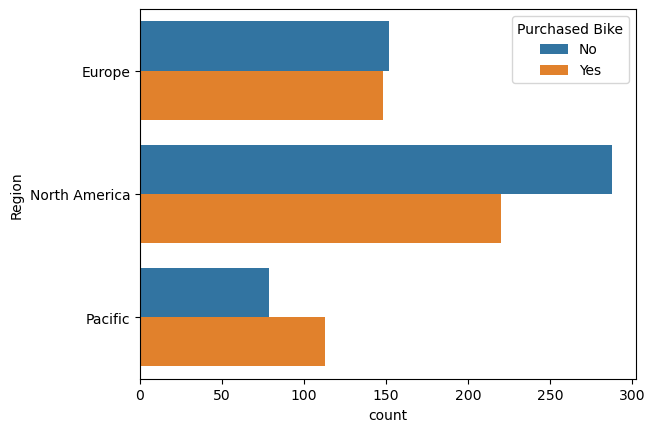

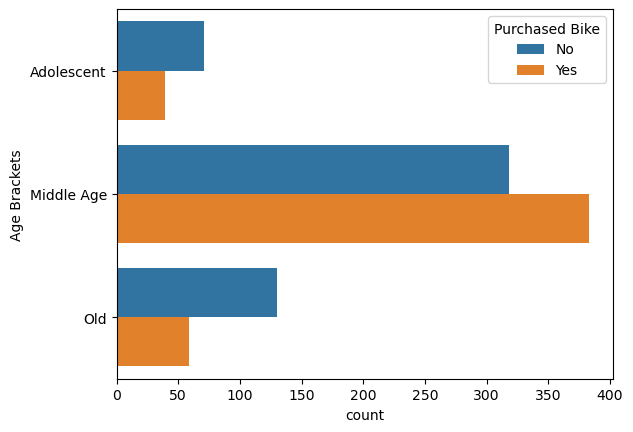

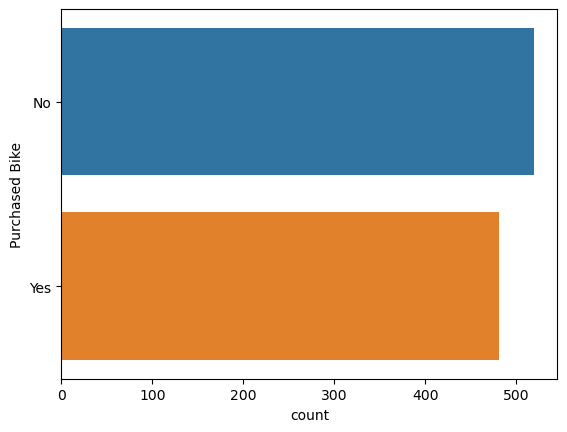

In [267]:
for col in df:
    if df[col].dtype == 'O':
        df[col] = df[col].astype('category')
        sns.countplot(y=col,data=df,hue='Purchased Bike')
        plt.show()

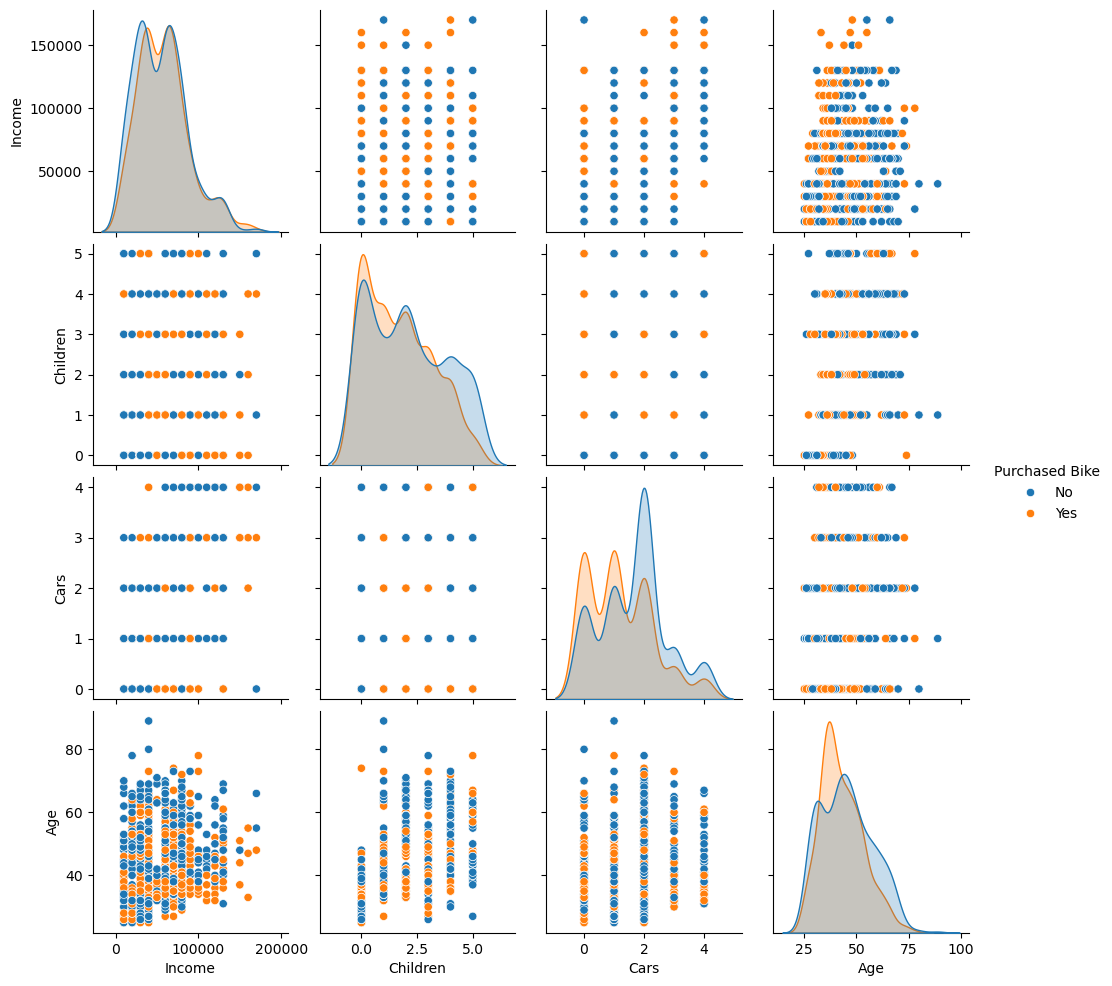

In [268]:
# This pairplot displays scatter plots for all pairs of features in the DataFrame `df`
sns.pairplot(df,hue='Purchased Bike')

<Axes: >

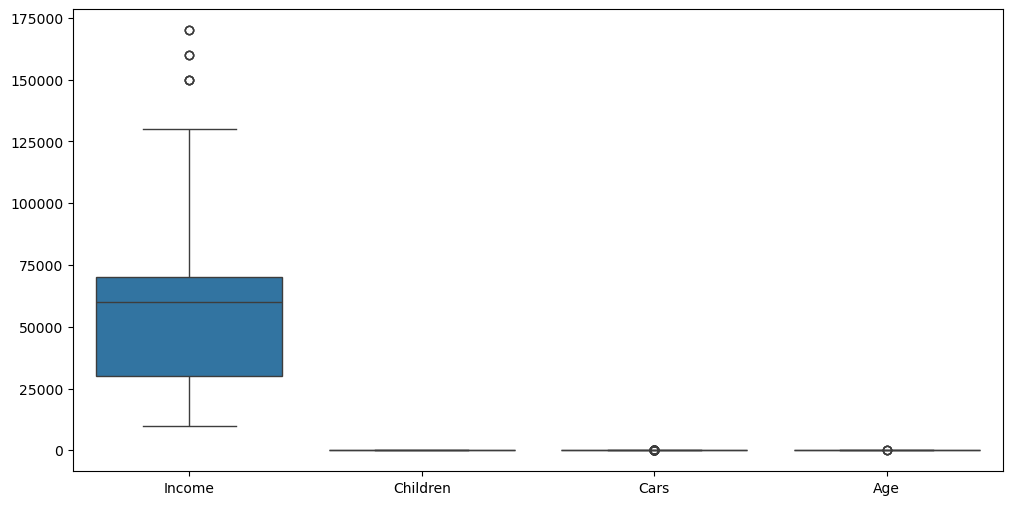

In [269]:
# boxplot shows the distribution, median, and outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df)

## Handeling Categorical Data

In [271]:
from sklearn.preprocessing import OrdinalEncoder

# Define the categories for each column
categories = {
    'Age Brackets': ['Adolescent', 'Middle Age', 'Old'],
    'Education': ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'],
    'Occupation': ['Skilled Manual', 'Clerical', 'Professional', 'Manual', 'Management'],
    'Commute Distance': ['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', 'More than 10 Miles'],
    'Region': ['Europe', 'North America', 'Pacific'],
    'Martial Status': ['Single', 'Married'],
    'Gender': ['Male', 'Female'],
    'Home Owner': ['No', 'Yes']
}

# Apply Ordinal Encoding to each specified column
for column, cat_list in categories.items():
    encoder = OrdinalEncoder(categories=[cat_list])
    df[column] = encoder.fit_transform(df[[column]]).astype(int)

In [272]:
from sklearn.preprocessing import LabelEncoder

In [274]:
# Apply Label Encoding to output(y) column
le=LabelEncoder()

In [275]:
df['Purchased Bike']=le.fit_transform(df[['Purchased Bike']])

In [276]:
df.head()

,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,1,1,40000,1,3,0,1,0,0,0,42,1,0
1,1,0,30000,3,2,1,1,1,0,0,43,1,0
2,1,0,80000,5,2,2,0,2,2,0,60,2,0
3,0,0,70000,0,3,2,1,1,3,2,41,1,1
4,0,0,30000,0,3,1,0,0,0,0,36,1,1


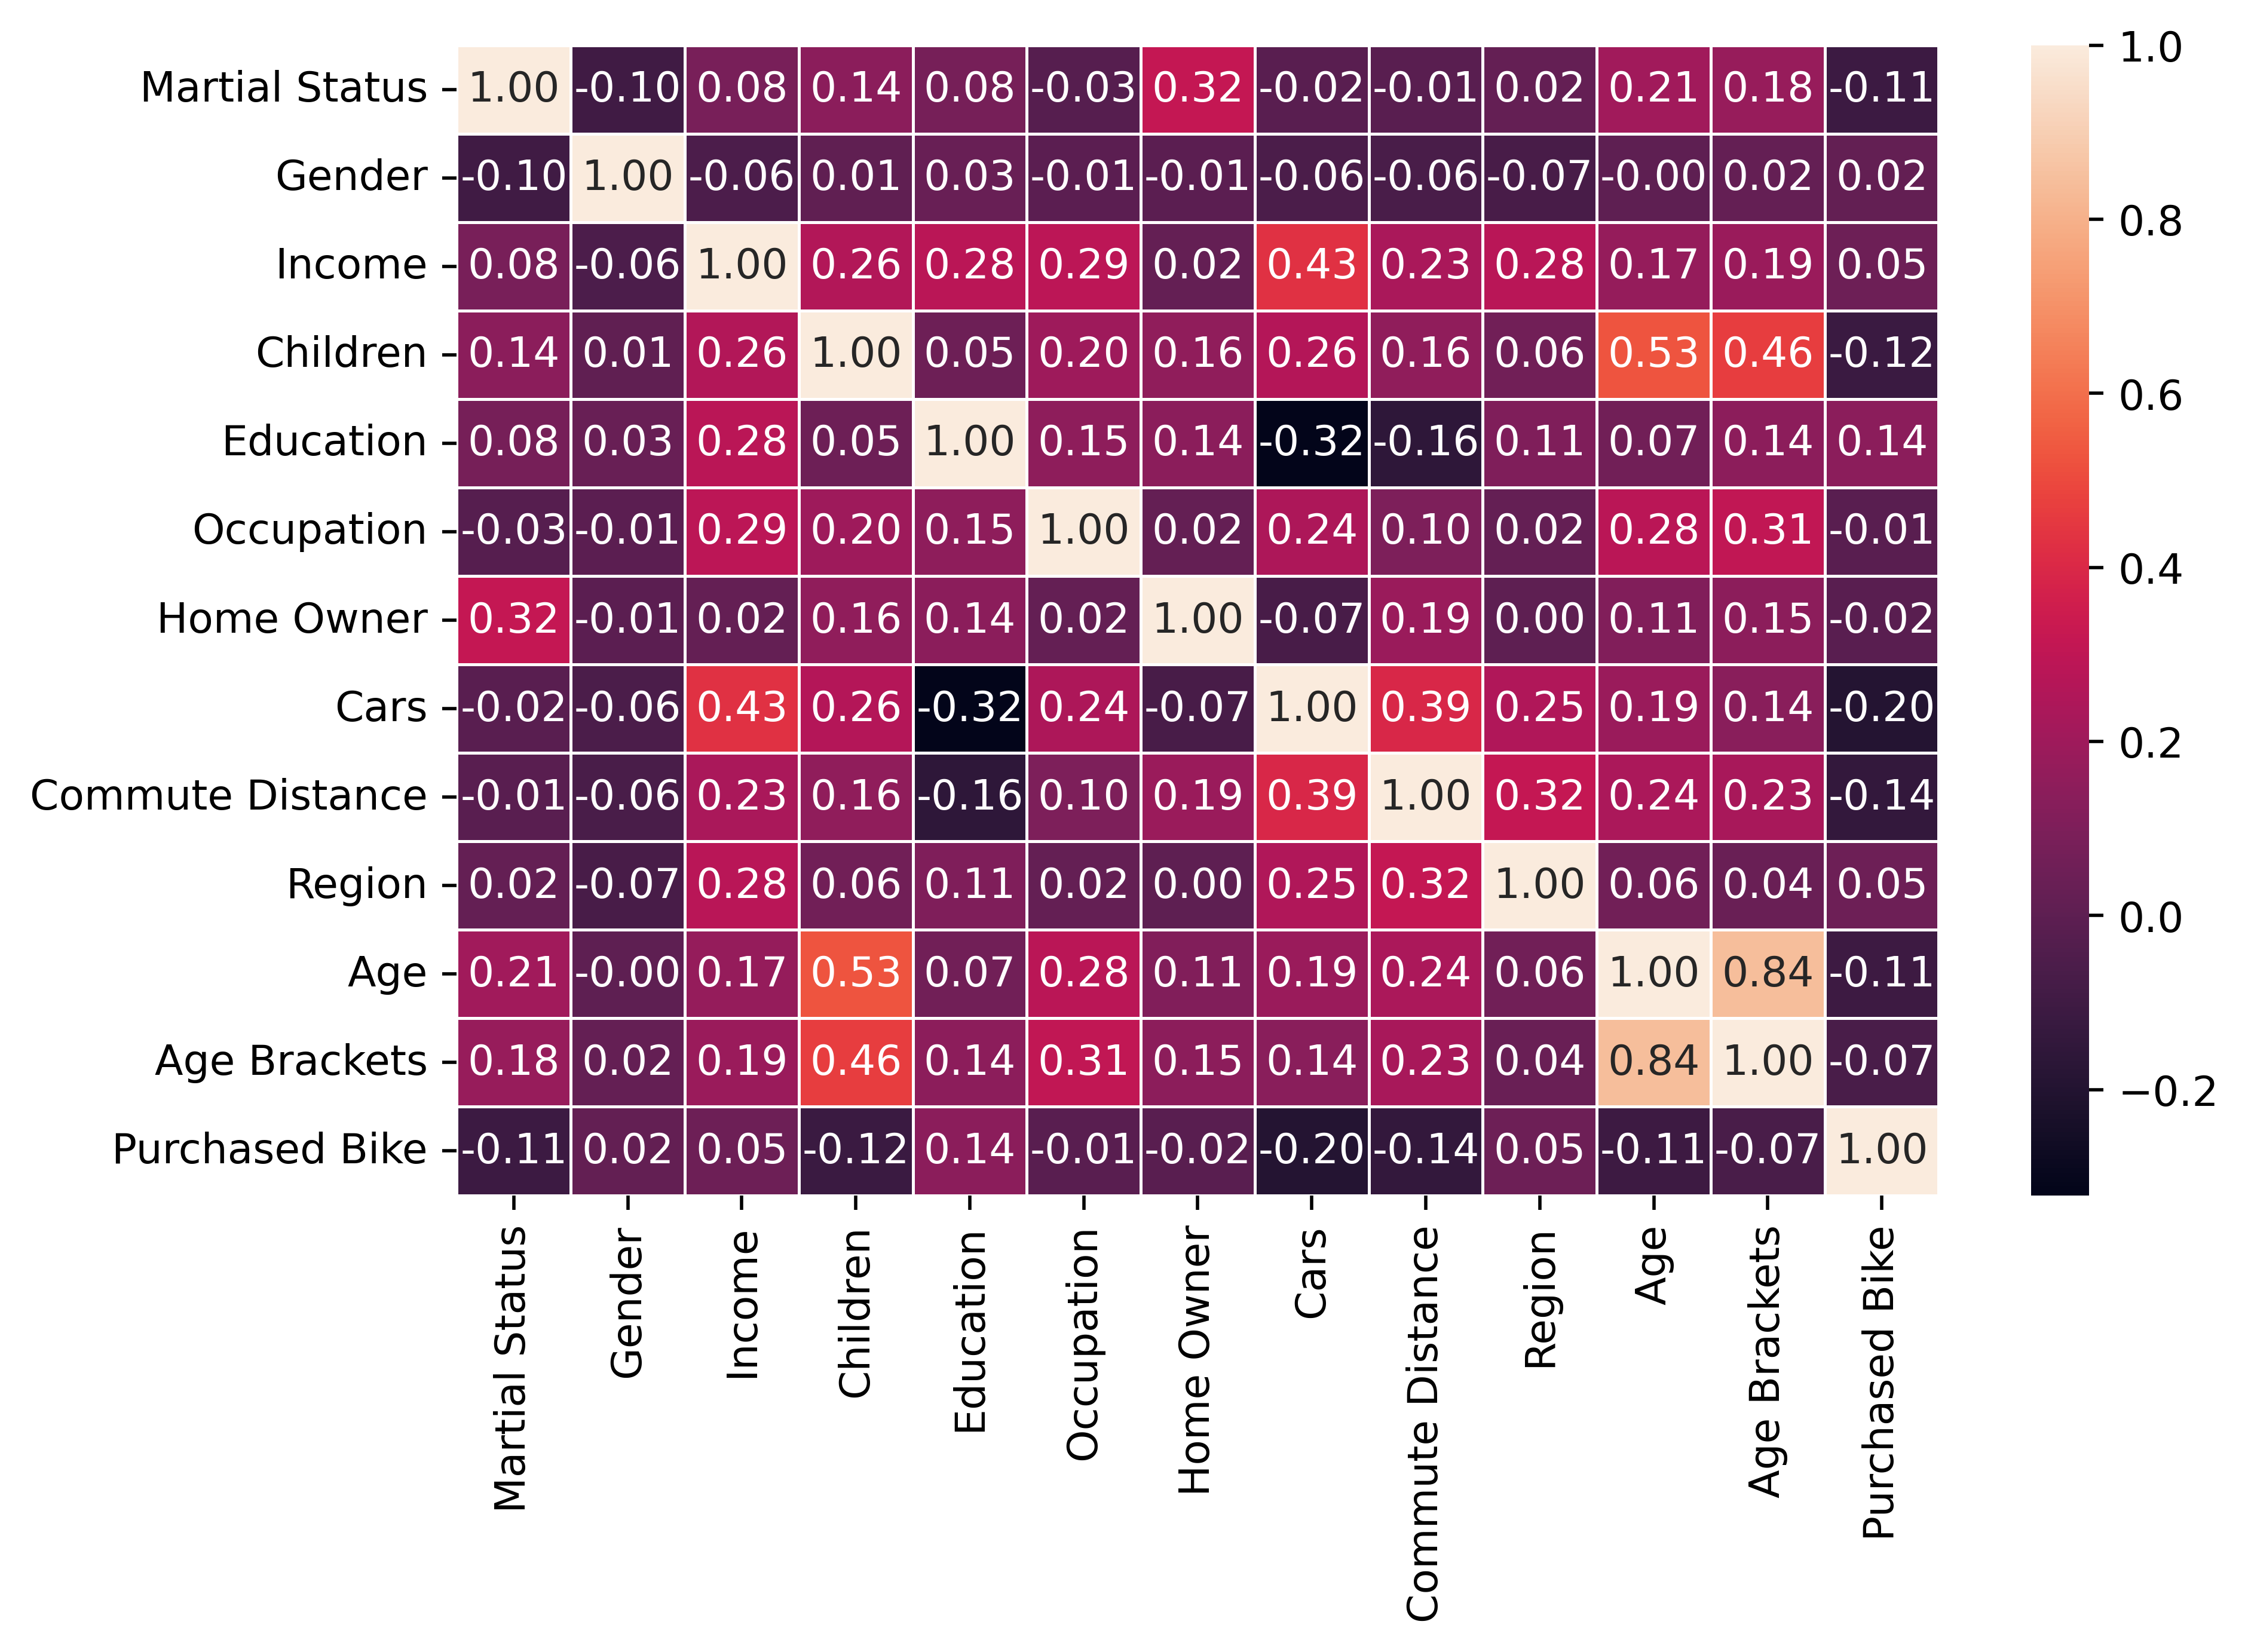

In [277]:
# Display a heatmap of the correlation matrix

corr= df.corr(method='pearson')
plt.figure(figsize=(8,5), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [292]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [298]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate the decision tree classifier
clf = DecisionTreeClassifier()

# Define hyperparameters to tune
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 10]}

# Use grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the decision tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'])
best_dt_classifier.fit(X_train, y_train)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10}


DecisionTreeClassifier(criterion='entropy', max_depth=10)

Confusion Matrix:
 [[78 23]
 [36 63]]


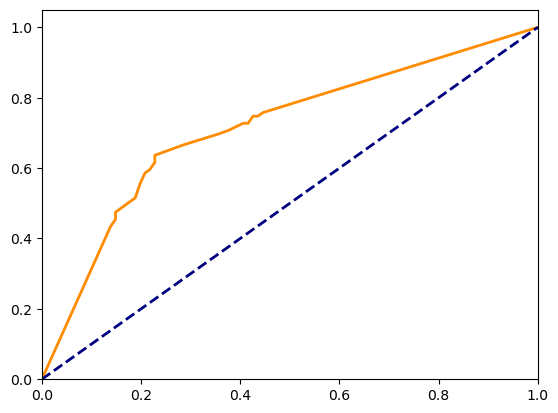

Accuracy: 0.705
Precision: 0.7325581395348837
Recall: 0.6363636363636364
F1 Score: 0.6810810810810811
AUC: 0.7146714671467147


In [299]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC curve and AUC
y_probs = best_dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Visualize ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", roc_auc)